In [129]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json, math
import re

faceData=[[] for i in range(40)]

for i in range(1,41):
    with open("C:/Users/Howar/Downloads/trent_testing_data/results"+str(i)+".json") as f:
        temp=json.load(f)
        
        for j in temp:
            temp2=[]
            for r in temp[j]:
                if type(r)==list:
                    val=r[0]
                else:
                    val=r
                temp2.append(val)
            faceData[i-1].append(np.var(np.array(temp2).astype(float)))
        #print(len(temp2['mouth4']))
    #print(np.var(np.array(lines).astype(float)))
    with open("C:/Users/Howar/Downloads/trent_testing_data/gsrResults"+str(i)+".json") as f:
        temp=json.load(f)
        #filter values that don't look like decimal numbers
        my_regex = re.compile(r"^\d+\.?\d*$")
        temp=list(filter(lambda x: my_regex.match(x) ,temp))
        for j in range(2):
            faceData[i-1].append(np.var(np.array(temp).astype(float)))
        #GSR=np.array(temp['gsr'])
        #print(temp[0])

differences=[[] for i in range(20)]

for i in range(20):
    row=faceData[i]
    row2=faceData[i+20]
    for j in range(len(row)):
        differences[i].append(abs(row[j]-row2[j]))
pd.DataFrame(faceData)
pd.DataFrame(differences)

lies=[2,3,5,6,7,9,10,11,13,14,17,18,19]
truths=[0,1,4,8,12,15,16]



lieData=[]
truthData=[]
for i in lies:
    lieData.append(differences[i])
for i in truths:
    truthData.append(differences[i])
#display(pd.DataFrame(lieData))
pd.DataFrame(truthData)

lieAverages=[]
truthAverages=[]
for col in range(68):
    lieAverages.append(np.mean(np.array(lieData)[:,col]))
    truthAverages.append(np.mean(np.array(truthData)[:,col]))
print(lieAverages)
print(truthAverages)

avgDifferences=[]
for i in range(68):
    avgDifferences.append(abs(lieAverages[i]-truthAverages[i]))
print(avgDifferences)

significantIndices=[]
insignificantIndices=[]
for i in range(len(avgDifferences)):
    if avgDifferences[i]>10:
        significantIndices.append(i)
    elif avgDifferences[i]<2:
        insignificantIndices.append(i)
print(significantIndices)
print(insignificantIndices)
#display(pd.DataFrame(faceData))


[11.457753176059843, 10.006088717252025, 9.025065719465546, 10.827021225967597, 8.605882304563334, 6.995203484956927, 7.595723046728855, 8.210029268203526, 9.53912069739583, 8.324138457380188, 10.762673765819445, 9.613537299607078, 7.731432885977963, 6.541440136944116, 7.623651403967167, 9.900288013209128, 10.817882751151892, 3.3574668983420324, 5.974903009520968, 14.39355635955671, 9.98911195016771, 8.86236095333538, 26.220872551174434, 32.98101787608478, 37.45761122174051, 34.57434815548109, 44.830404630615845, 9.519384096468496, 12.387834764580553, 12.439887166613563, 9.791554651412968, 7.864312275996588, 6.721307858305544, 6.378201553065016, 6.210350382048692, 6.158631145332081, 6.0521145320300045, 8.466491490784545, 9.070902788975493, 5.160512596303092, 7.714213253623959, 7.81804227872153, 13.824898362281449, 19.04556251759765, 21.250634399468133, 29.32833907922149, 18.975560714066553, 15.821689693960554, 13.93666283330564, 9.115622059286967, 8.572328748402393, 7.964657218853434, 

,0,1,2,3,4,5,6,7,8,9,...,60,61,62,63,64,65,66,67,68,69
0,14.585368,22.634035,26.104766,28.308996,28.047855,25.638309,20.687126,17.090158,11.187562,7.499312,...,12.913245,7.602166,6.398361,5.804659,7.244802,5.435236,5.439357,6.560398,267.577766,267.577766
1,14.329715,15.396132,19.338515,28.711498,22.648511,19.546702,13.216307,9.097820,7.842033,7.642934,...,29.657665,13.878235,11.739884,11.021749,8.686713,12.014984,15.522295,13.511265,134.448554,134.448554
2,16.635447,19.046564,23.199871,30.867929,24.578246,21.383623,14.034242,10.551875,6.812858,5.707578,...,6.912058,4.009958,4.244488,6.601272,10.287522,7.073602,4.849043,4.748734,153.288633,153.288633
3,6.821125,12.174494,14.299289,23.878004,25.548802,25.952109,18.851269,12.718615,9.832732,5.432552,...,11.004244,3.044320,3.236968,4.900434,6.993175,5.039708,3.552672,3.456250,149.535560,149.535560
4,6.991808,10.109746,10.325035,15.342251,13.521161,12.567105,11.398009,9.705112,11.081738,10.600133,...,12.234949,6.371574,6.357770,8.154925,9.179505,7.743244,7.570238,8.513253,296.643718,296.643718
5,15.269378,13.356513,12.471365,14.345070,14.747892,17.049143,19.066077,19.819855,14.995028,11.131684,...,12.245409,9.262553,9.079235,9.944146,10.197296,10.620457,11.343968,11.866685,133.964390,133.964390
6,11.388295,12.841653,12.365641,13.886855,21.065146,28.229858,28.321373,25.943599,23.839191,18.484296,...,14.006765,12.002900,14.141040,16.808340,17.408424,19.166431,17.085297,17.653445,156.415510,156.415510
7,20.682770,21.966316,17.444101,15.141962,10.623549,9.798214,9.336339,8.372950,8.076306,7.671411,...,8.914258,6.936780,5.799326,6.281941,6.831026,5.057484,6.436253,7.697436,184.452707,184.452707
8,18.676140,26.006397,27.090008,31.662730,28.015212,32.166051,25.367434,21.371575,16.954711,9.965290,...,12.645902,6.065708,5.411592,6.675451,8.479407,7.883957,7.877013,8.209805,326.237843,326.237843
9,6.899319,9.127964,8.171565,9.438032,7.625173,7.183948,7.371364,6.021278,6.165212,6.584836,...,12.526647,11.358142,10.112678,10.302760,7.984414,9.159234,11.502463,13.624804,74.365556,74.365556


In [131]:
#copy over faceData, but weight the significant indices more and ignore insignificant indices
faceData2=[[] for i in range(20)]
for i in range(20,40):
    for j in range(len(faceData[i])):
        if j in significantIndices:
            for k in range(2):
                faceData2[i-20].append(faceData[i][j])
        #else:# j in insignificantIndices:
            #pass
        else:
            faceData2[i-20].append(faceData[i][j])

pd.DataFrame(faceData2)


,0,1,2,3,4,5,6,7,8,9,...,66,67,68,69,70,71,72,73,74,75
0,5.498025,6.091579,7.973949,11.048663,9.406104,9.759593,7.999425,8.162964,9.790398,8.553771,...,15.353287,11.236953,9.787458,12.935497,9.000259,8.040758,7.677497,8.394958,41.046417,41.046417
1,17.003584,16.827393,18.348206,21.525919,21.592398,22.870692,20.385483,18.103232,19.767189,16.976823,...,31.327091,23.862102,21.184653,22.774615,20.453334,19.004243,18.826164,19.275488,37.139592,37.139592
2,11.902777,14.157798,15.629257,15.787440,15.749711,19.693304,24.904660,35.110057,39.020635,29.172655,...,26.508110,21.513381,20.057777,19.578933,17.620365,16.476965,17.195637,18.812516,20.509678,20.509678
3,19.623539,16.092930,18.272576,18.167747,18.995579,22.831088,23.475024,27.701101,30.739245,26.878570,...,18.199705,12.250637,11.035459,12.349832,14.084731,11.259668,11.309433,10.555827,5.779806,5.779806
4,5.673742,7.752051,8.140686,9.900911,8.973945,11.022295,12.394076,14.678508,16.702614,18.983288,...,16.223408,10.370621,9.671953,10.905898,10.904333,7.975096,8.843809,7.620188,9.351473,9.351473
5,3.936146,3.589259,3.504742,5.331149,5.059824,6.467529,6.359290,7.535450,9.219525,10.544932,...,7.878195,8.393493,9.043106,11.903375,12.395714,9.396934,8.362708,7.060490,12.663539,12.663539
6,6.780975,5.053225,4.498616,5.334521,5.042963,7.342382,7.084196,5.815837,8.166593,9.297946,...,6.789324,6.278653,6.202062,8.665275,7.646383,6.350723,5.516949,5.267664,8.426889,8.426889
7,10.165352,6.635368,6.883388,12.923541,13.399863,11.234422,11.788272,9.067351,14.050397,14.442767,...,33.041215,17.794458,17.328860,23.730907,23.457586,17.997731,19.563491,16.319405,36.444197,36.444197
8,8.428045,5.525038,4.875871,4.193045,3.489517,3.977430,3.411229,4.119515,6.025656,6.206778,...,12.264928,7.483457,7.414375,10.374267,11.245113,7.758416,8.008362,7.113918,21.376314,21.376314
9,33.840530,43.423374,45.615816,45.726145,30.027326,27.255282,21.519758,21.194725,19.265383,13.193567,...,24.711522,16.982964,15.347505,14.072079,18.325400,11.837784,14.296019,12.235499,8.146400,8.146400


original shape:    (20, 76)
transformed shape: (20, 2)


<Axes: >

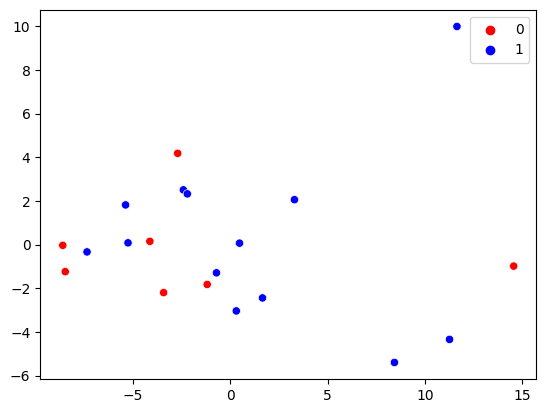

In [132]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

X=StandardScaler().fit_transform(faceData2)
pca = PCA(n_components=2)
pca.fit(X)
face_pca = pca.transform(X)
print("original shape:   ", X.shape) ##(69,2640*7680)
print("transformed shape:", face_pca.shape)
lieTruthKey=[0,0,1,1,0,1,1,1,0,1,1,1,0,1,1,0,0,1,1,1]


sns.scatterplot(x=face_pca[:,0],y=face_pca[:,1], hue=lieTruthKey, palette=['red','blue'])

In [124]:
len(faceData[30])

70

In [146]:
trainingSet=[[] for i in range (10)]
testingSet=[[] for i in range (10)]

for i in range(20,30):
    for j in range(len(faceData[i])):
        if j in significantIndices:
            for k in range(2):
                trainingSet[i-20].append(faceData[i][j])
        else:
            trainingSet[i-20].append(faceData[i][j])
    
for i in range(30,40):
    for j in range(len(faceData[i])):
        if j in significantIndices:
            for k in range(2):
                testingSet[i-30].append(faceData[i][j])
        else:
            testingSet[i-30].append(faceData[i][j])


pd.DataFrame(trainingSet)

,0,1,2,3,4,5,6,7,8,9,...,66,67,68,69,70,71,72,73,74,75
0,5.498025,6.091579,7.973949,11.048663,9.406104,9.759593,7.999425,8.162964,9.790398,8.553771,...,15.353287,11.236953,9.787458,12.935497,9.000259,8.040758,7.677497,8.394958,41.046417,41.046417
1,17.003584,16.827393,18.348206,21.525919,21.592398,22.870692,20.385483,18.103232,19.767189,16.976823,...,31.327091,23.862102,21.184653,22.774615,20.453334,19.004243,18.826164,19.275488,37.139592,37.139592
2,11.902777,14.157798,15.629257,15.787440,15.749711,19.693304,24.904660,35.110057,39.020635,29.172655,...,26.508110,21.513381,20.057777,19.578933,17.620365,16.476965,17.195637,18.812516,20.509678,20.509678
3,19.623539,16.092930,18.272576,18.167747,18.995579,22.831088,23.475024,27.701101,30.739245,26.878570,...,18.199705,12.250637,11.035459,12.349832,14.084731,11.259668,11.309433,10.555827,5.779806,5.779806
4,5.673742,7.752051,8.140686,9.900911,8.973945,11.022295,12.394076,14.678508,16.702614,18.983288,...,16.223408,10.370621,9.671953,10.905898,10.904333,7.975096,8.843809,7.620188,9.351473,9.351473
5,3.936146,3.589259,3.504742,5.331149,5.059824,6.467529,6.359290,7.535450,9.219525,10.544932,...,7.878195,8.393493,9.043106,11.903375,12.395714,9.396934,8.362708,7.060490,12.663539,12.663539
6,6.780975,5.053225,4.498616,5.334521,5.042963,7.342382,7.084196,5.815837,8.166593,9.297946,...,6.789324,6.278653,6.202062,8.665275,7.646383,6.350723,5.516949,5.267664,8.426889,8.426889
7,10.165352,6.635368,6.883388,12.923541,13.399863,11.234422,11.788272,9.067351,14.050397,14.442767,...,33.041215,17.794458,17.328860,23.730907,23.457586,17.997731,19.563491,16.319405,36.444197,36.444197
8,8.428045,5.525038,4.875871,4.193045,3.489517,3.977430,3.411229,4.119515,6.025656,6.206778,...,12.264928,7.483457,7.414375,10.374267,11.245113,7.758416,8.008362,7.113918,21.376314,21.376314
9,33.840530,43.423374,45.615816,45.726145,30.027326,27.255282,21.519758,21.194725,19.265383,13.193567,...,24.711522,16.982964,15.347505,14.072079,18.325400,11.837784,14.296019,12.235499,8.146400,8.146400


original shape:    (10, 76)
transformed shape: (10, 2)


<Axes: >

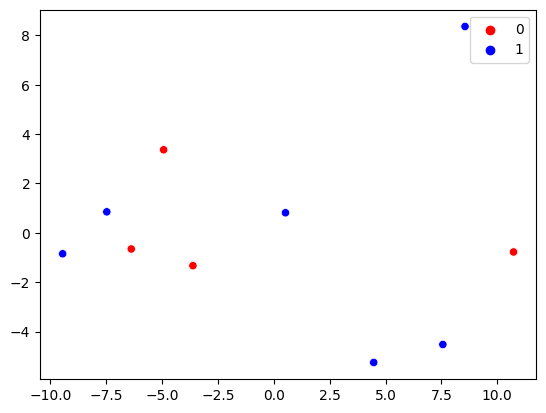

In [138]:
X=StandardScaler().fit_transform(trainingSet)
pca = PCA(n_components=2)
pca.fit(X)
face_pca = pca.transform(X)
print("original shape:   ", X.shape) ##(69,2640*7680)
print("transformed shape:", face_pca.shape)
lieTruthKey=[0,0,1,1,0,1,1,1,0,1]


sns.scatterplot(x=face_pca[:,0],y=face_pca[:,1], hue=lieTruthKey, palette=['red','blue'])

In [177]:
fittedTrainingSet=[]
#print(trainingSet[0])
Y=StandardScaler().fit_transform(testingSet)
answer_pca=pca.transform(Y)

from sklearn.neighbors import KNeighborsClassifier

neigh = KNeighborsClassifier(n_neighbors=2)

neigh.fit(face_pca, lieTruthKey)

print(neigh.predict(answer_pca))
#Correct values: [1,1,0,1,1,0,0,1,1,1]


[0 0 0 1 1 0 1 0 1 1]


In [175]:

# Import necessary modules
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
  
# Loading data
irisData = load_iris()
  
# Create feature and target arrays
X = irisData.data
y = irisData.target

print(X)
print(y)
display(pd.DataFrame(X))
  
# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(
             X, y, test_size = 0.2, random_state=42)
  
knn = KNeighborsClassifier(n_neighbors=3)
  
knn.fit(X_train, y_train)
  
# Predict on dataset which model has not seen before
print(knn.predict(X_test))

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]
